**Scientific Computation (MKP3303)**


>> R.U.Gobithaasan (2021). Scientific Computing, Lectures for Undergraduate Degree Program B.Sc (Applied Mathematics), Faculty of Ocean Engineering Technology & Informatics, University Malaysia Terengganu.
https://sites.google.com/site/gobithaasan/LearnTeach

<p align="center">
     © 2021 R.U. Gobithaasan All Rights Reserved.

</p>



**Chapter 6: Solution of Equation: Differentiation**   

1. Limits 
2. Differentiation: derivatives and ODEs.                                                
3. Solution for single variable equation
4. Solution for systems of equation


References: 
-  [SciPy Lecture Notes](http://scipy-lectures.org/)
- Robert Johansson, Numerical Python: Scientific Computing and Data Science Applications with Numpy, SciPy and Matplotlib (2019, Apress).


In [1]:
from IPython.display import IFrame
doc = IFrame(src = 'https://docs.sympy.org/latest/modules/core.html?highlight=diff#sympy.core.function.diff', width=1155, height=400)
display(doc)

In [2]:
import sympy
print(sympy.__version__)

sympy.init_printing() # to print out mathematical equations

1.8


# Limits

- Natural phenomena can be represented in the form of **functions**, which may depend on one or many independent variables.
- **Limits** denotes the value of a function as one of its variables approaches a specific value or as the value of the variable approaches to negative or positive infinity. 

- We can use limits is to find the **asymptotic behavior** as a function.

- An example of a limit computations is
$\displaystyle \lim_{x\to \pi/2} f(x)%$, where $ f(x) = \tan(x)$

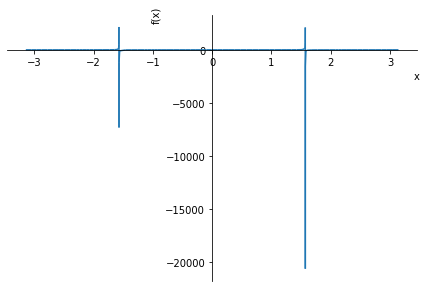

In [3]:
x = sympy.Symbol('x')
g1 = sympy.tan(x)
sympy.plot(g1, (x, -1 *sympy.pi, sympy.pi))
sympy.limit(g1, x, sympy.pi/2)

example: 

$\displaystyle \lim_{x\to 10} f(x)%$, where $ f(x) = \tan(x)$, where $f(x) = {\sinh (x)+1}$

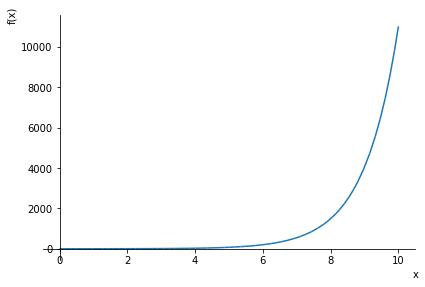

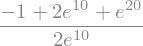

In [4]:
g2 = (sympy.sinh(x)+1)
sympy.plot(g2, (x, 0, 10))
sympy.limit(g2, x, 10)

example: 

$\displaystyle \lim_{x\to \pi/2} f(x)%$, where $ f(x) = \tan(x)$, where $f(x) = \frac{\sinh (x)}{\exp (x)}$

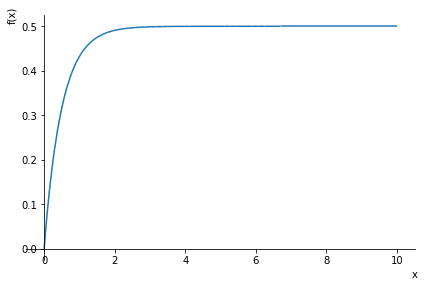

In [5]:
g3 = (sympy.sinh(x))/sympy.exp(x)
sympy.plot(g3, (x, 0, 10))
sympy.limit(g3, x, sympy.oo)

### Limit as Differentiation operator

- The rate of change of gradient for f(x), which also indicates the tangent direction: 
$$
\displaystyle \frac{d}{d x} f{\left(x \right)} =  \lim_{x\to 0} \frac{
\Delta y}{\Delta x}%$,
$$

- The definitions of the derivative is in fact can be represented in the form of limit:

$$
\displaystyle \frac{d}{d x} f{\left(x \right)} =  \lim_{h\to 0} \frac{(f(x + h) - f(x))}{h}%$,
$$


In [6]:
x, h = sympy.symbols("x, h")
f = sympy.Function('f')
limit_h = (f(x + h) - f(x))/h

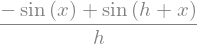

In [7]:
mydiff = limit_h.subs(f, sympy.sin)
mydiff

In [8]:
sympy.limit(mydiff,h,0)

# Differentiation: Derivatives

## Derivatives

 - Derivatives are the rate of change of a function with respect to its independent variable.
- We differentiate using `sympy.diff` or alternatively by using the diff method of SymPy expression instances. 
- The **order** of differentiation is the number of derivative respect to the independent variable.


###  Arbitrary functions with a single independent variable

- The argument to these functions is a number of symbols. For example, the first-order derivative of a function f (x) with respect to x:

In [9]:
x = sympy.Symbol('x')
f = sympy.Function('f')(x)
sympy.diff(f, x, 0) # original function wihout derivative computation

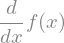

In [10]:
sympy.diff(f, x, 1) # first derivative computation

In [11]:
type(_)

sympy.core.function.Derivative

- Higher order: Two ways to compute the second-order derivative of a function f (x) with respect to x:

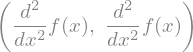

In [12]:
sympy.diff(f, x, x) , sympy.diff(f, x, 2)

- Higher order: Two ways to compute the third-order derivative of a function f (x) with respect to x:

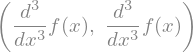

In [13]:
sympy.diff(f, x, x, x) , sympy.diff(f, x, 3)

#### Functions defined 

 -  example: $\frac{d}{d x} f{\left(x \right)}$, where $f(x) = sin(x)$

In [14]:
x = sympy.symbols('x')
f_sol = sympy.diff(sympy.sin(x), x,1)

- We can always
double- check: 
$$
\int cos(x) dx  = sin(x) + C_1
$$
where $C_1$ is the integration constant.

In [15]:
sympy.integrate(f_sol)

In [16]:
x = sympy.symbols('x')
f1 = sympy.sin(x)
sympy.diff(f1, x,1)

In [17]:
f1.diff(x), f1.diff(x,2)  # short way

 - evaluating the derived function using `subs`

In [18]:
x = sympy.symbols('x')
f2 = 3*x**2
f2.diff(x,1)

In [19]:
_.subs(x, sympy.pi)

In [20]:
f2.diff(x).subs(x, sympy.pi) 

###  Functions with multiple variables

- the derivative of a function with several independent variables are called partial derivatives.

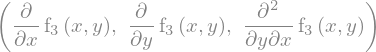

In [21]:
x,y = sympy.symbols('x,y')
f3 = sympy.Function('f3')(x,y)
sympy.diff(f3, x), sympy.diff(f3, y), sympy.diff(f3, x, y)

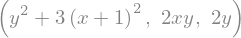

In [22]:
x,y = sympy.symbols('x,y')
f4 =(x + 1)**3 + x*y ** 2
sympy.diff(f4, x), sympy.diff(f4, y), sympy.diff(f4, x, y)

In [23]:
f4.diff(x,y)

### Delayed differentiation

 - declaring the derivatives with repsect to its variable

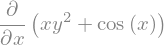

In [24]:
f5 = sympy.Derivative(sympy.cos(x) + + x*y ** 2, x)
f5

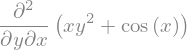

In [25]:
f6 = sympy.Derivative(sympy.cos(x) + + x*y ** 2, x,y)
f6

 - evaluating the derivatives.

In [26]:
f5.doit(), f6.doit()

## Ordinary Differential Equation (ODE)

- Usually we do not know explicitly the function that represents a phenomena.
- We may only know substantial relations of the variables, which mainly focusing on how it changes; **rate of change with respect to its independent variables, hence we can represent this relation in the form of derivatives**.
- Any equations with unknown function defined in the form of derivatives called differential equations (DE).
- Different equations can be divided into two kinds:
> 1. **Ordinary Differential Equation**: unknown function with a single variable.
> 2. **Partial Differential Equation**: unknown function with several variables.
- In fact, ODE is a special type of PDE!
- The order of ODE an ODE is the highest derivative of the unknown function that appears in the equation.
- The **solution of ODE** is any function which satisfies the ODE. Thus, we may substitute the function along with its derivatives to inspect if it is true. 

Example: 
\begin{align*}
\frac{d}{d x} y(x) &= 2 x \\
y' &= 2 x \\
\Rightarrow y'- 2 x &= 0
\end{align*}

A standard way to represent the ODE is, in the form a function with x and y' as its argument:
$$
f(x,y') = y' - 2x 
$$

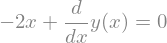

In [27]:
x, y = sympy.symbols("x, y")
y = sympy.Function("y")
ode1 = y(x).diff(x) - 2*x
sympy.Eq(ode1,0) # ODE equation = 0

In [28]:
ode_sol1 = sympy.dsolve(ode1)
ode_sol1 # C1 is the integration constant

In [29]:
type(ode_sol1)

sympy.core.relational.Equality

In [30]:
ode_sol1.free_symbols

- accessing left-hand-side (lhs) and right-hand-side (rhs) of the solution:

In [31]:
 ode_sol1.lhs , ode_sol1.rhs 

- check: 
\begin{align*}
\frac{d}{d x} y{\left(x \right)} &= \frac{d}{d x} (C_1 + x^2) \\
\Rightarrow  y' &= 2x 
\end{align*}

In [32]:
sympy.diff(ode_sol1.rhs,x) == 2*x

True

### First Oder ODE with an Initial condition: trivial example

- We need to use the given initial conditions (IC) to find the values of the integration constants. 


**trivial example:**

\begin{align*}
y'- 2x = 0\\
\Rightarrow y{\left(x \right)} = C_{1} + x^{2}
\end{align*}

In [33]:
ode_sol1 # C1 is the integration constant

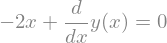

In [34]:
sympy.Eq(ode1,0)

example:    
$$y'- 2x = 0
$$
with initial condition (IC) as $y(0) = y_0$

In [35]:
ode_sol1.subs(x,0)


- Let the initial condition is $y(0) = y_0$, we describes the IC using a **dictionary**, which can be substituted later:
> `IC = {y(0):  y0}` 

In [36]:
y0 = sympy.Symbol('y0')
IC = {y(0): y0}
IC

In [37]:
y_eq = ode_sol1.subs(x, 0).subs(IC)
y_eq

In [38]:
sol = sympy.solve(y_eq)
sol

In [39]:
y_sol = ode_sol1.subs(sol[0])
y_sol

### **Direction Field for order 1 ODE** 
by Robert Johansson, Numerical Python: Scientific Computing and Data Science Applications with Numpy, SciPy and Matplotlib (2019, Apress).

- We can produce the direction field graphs for the ODEs on the form $\frac{dy(x)}{dx} = f (x,y(x))$ 



For example, the following code generates the direction field
dx
graphs for f (x, y(x)) = y(x)2+x, f (x, y(x)) = − x/y(x), and f (x, y(x)) = y(x)2/x. The result is shown in Figure 9-2

In [40]:
import matplotlib.pyplot as plt

def plot_direction_field(x, y_x, f_xy, x_lim=(-5, 5), y_lim=(-5, 5), ax=None):
        f_np = sympy.lambdify((x, y_x), f_xy, 'numpy')
        x_vec = np.linspace(x_lim[0], x_lim[1], 20)
        y_vec = np.linspace(y_lim[0], y_lim[1], 20)
        
        if ax is None:
            _, ax = plt.subplots(figsize=(4, 4))
             
        dx = x_vec[1] - x_vec[0]
        dy = y_vec[1] - y_vec[0]
        
        for m, xx in enumerate(x_vec):
            for n, yy in enumerate(y_vec):
                Dy = f_np(xx, yy) * dx
                Dx = 0.8 * dx**2 / np.sqrt(dx**2 + Dy**2)
                Dy = 0.8 * Dy*dy / np.sqrt(dx**2 + Dy**2)
                ax.plot([xx - Dx/2, xx + Dx/2],
                        [yy - Dy/2, yy + Dy/2], 'b', lw=0.5)
        
        ax.axis('tight')
        ax.set_title(r"$%s$" %
                    (sympy.latex(sympy.Eq(y(x).diff(x), f_xy))),
                    fontsize=18)
        return ax

Example: 
\begin{align*}
\frac{d}{d x} y(x) &= 2 x \\
\end{align*}

In [41]:
y0 = sympy.symbols("y0")
y = sympy.Function("y")
y_sol.subs(y0,1)
y_x = sympy.lambdify(x, y_sol.rhs.subs(y0,1),'numpy')

y_sol.subs(y0,1), y_x(-3), y_x(6)

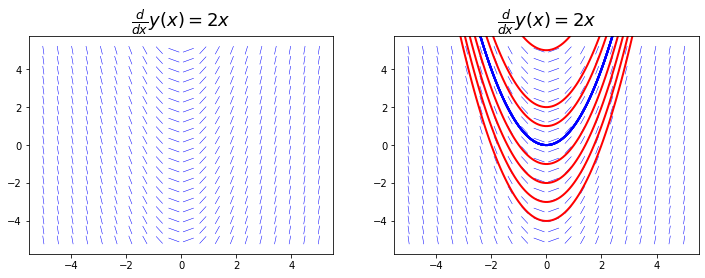

In [42]:
import numpy as np
x_vec = np.linspace(-4, 4, 100)
x, y0_val = sympy.symbols("x,y_val")
y = sympy.Function("y")
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_direction_field(x, y(x), 2*x, ax=axes[0]);
plot_direction_field(x, y(x), 2*x, ax=axes[1]);
y0, y0_val= sympy.symbols('y0,y0_val')

for y0_val in [-4, -3, -2, -1,  1, 2, 5]:
    y_x = sympy.lambdify(x, y_sol.rhs.subs(y0,y0_val))
    axes[1].plot(x_vec, y_x(x_vec), 'r', lw=2)
    axes[1].plot(x_vec, sympy.lambdify(x, y_sol.rhs.subs(y0,0))(x_vec), 'b', lw=2)
    

Example: ODE Order one
\begin{align*}
\frac{d}{d x} y{\left(x \right)} = x + y^{2}{\left(x \right)}\\
\Rightarrow f (x,y(x)) = x + y^{2}
\end{align*}

- One way to inspect the solution is, we investigate the direction field

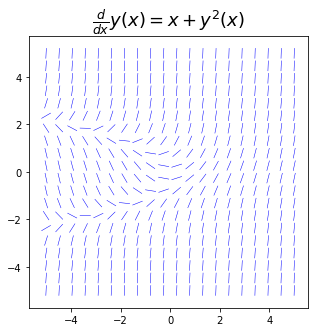

In [43]:
x = sympy.symbols("x")
y = sympy.Function("y")
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
plot_direction_field(x, y(x), y(x)**2 + x, ax=axes);

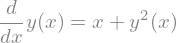

In [44]:
x = sympy.symbols("x")
y = sympy.Function("y")
f = y(x)**2 + x
sympy.Eq(y(x).diff(x), f)


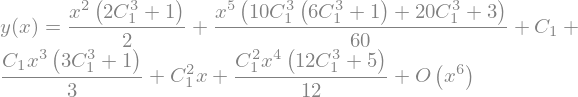

In [45]:
sympy.dsolve(y(x).diff(x) - f)

---
#### No analytical solution: ODE order two

Example: 
\begin{align*}
\frac{d^{2}}{d x^{2}} y{\left(x \right)} = x + y^{2}{\left(x \right)}\\
\end{align*}

In [58]:
x = sympy.symbols("x")
y = sympy.Function("y")
f = y(x)**2 + x

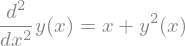

In [59]:
sympy.Eq(y(x).diff(x, x), f)

In [60]:
#sympy.dsolve(y(x).diff(x, x) - f)
#NotImplementedError: solve: Cannot solve -x - y(x)**2 + Derivative(y(x), (x, 2))

### Numerical Solution with SciPy

- There are many approaches to solving ODEs numerically, for example,, Euler and Runge-Kutta's method. 

- We write ODEs on the standard form:
$$
\frac{d}{d x} y{\left(x \right)} = f (x,y(x)), 
$$
where y(x) is a array of unknown dx functions of x. 

- SciPy provides functions for the numerical integration of ODE problems. SciPy provides two ODE solver interfaces:
     1. `integrate.odeint`: based on [LSODA solver from ODEPACK](http://computation.llnl.gov/casc/odepack) (Adams predictor-corrector  and BDF method), 
         - easier to use.
     2. `integrate.ode`: based on various solvers: [VODE, ZVODE, LSODA and etc.](http://www.netlib.org/ode) (fourth- and eighth- order Dormand-Prince methods (i.e., types of Runge-Kutta methods) with adaptive stepsize).
         - object-oriented interface more flexible.

In [61]:
integrate.odeint?

Object `integrate.odeint` not found.


Example: 
$$
f (x,y(x)) = x + y^{2}
$$

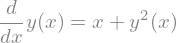

In [62]:
x = sympy.symbols("x")
y = sympy.Function("y")
f = y(x)**2 + x
sympy.Eq(y(x).diff(x), f)

In [63]:
import numpy as np
from scipy import integrate

f_np = sympy.lambdify((y(x), x), f) # a function of two arguments: f_np(y,x)

In [64]:
f_np(2,0)

In [65]:
y0 = 0 # Initial condition
#points to compute:  x is positive
xp = np.linspace(0, 1.9, 100)
yp = integrate.odeint(f_np, y0, xp) # SciPy's numerical ODE computation

In [66]:
#points to compute:  x is negative
xm = np.linspace(0, -5, 100) 
ym = integrate.odeint(f_np, y0, xm)

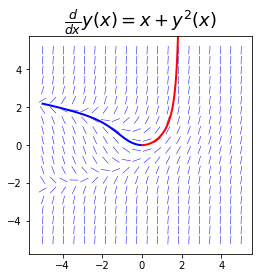

In [67]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_direction_field(x, y(x), f, ax=ax)
ax.plot(xm, ym, 'b', lw=2)
ax.plot(xp, yp, 'r', lw=2)

Example: 
$$
f (x,y(x)) = x + y^{2}
$$

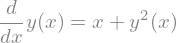

In [62]:
x = sympy.symbols("x")
y = sympy.Function("y")
f = y(x)**2 + x
sympy.Eq(y(x).diff(x), f)

In [63]:
import numpy as np
from scipy import integrate

f_np = sympy.lambdify((y(x), x), f) # a function of two arguments: f_np(y,x)

In [64]:
f_np(2,0)

In [65]:
y0 = 0 # Initial condition
#points to compute:  x is positive
xp = np.linspace(0, 1.9, 100)
yp = integrate.odeint(f_np, y0, xp) # SciPy's numerical ODE computation

In [66]:
#points to compute:  x is negative
xm = np.linspace(0, -5, 100) 
ym = integrate.odeint(f_np, y0, xm)

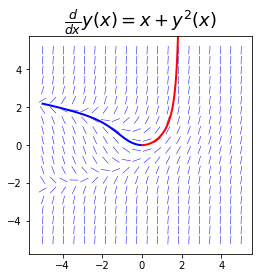

In [67]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_direction_field(x, y(x), f, ax=ax)
ax.plot(xm, ym, 'b', lw=2)
ax.plot(xp, yp, 'r', lw=2)

### Higher order ODE

**example: ODE Order 2:**     
$$y''- 3 x^2 = 0
$$
with initial conditions: 
> 1. $y(0) = y_0$,  
> 2. $y'(0) = y_1$ 

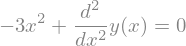

In [46]:
x, y, y0, y1 = sympy.symbols("x, y, y_0, y_1")
y = sympy.Function("y")
ode2 = y(x).diff(x,2) - 3*x**2
sympy.Eq(ode2,0)

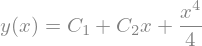

In [47]:
ode_sol2 = sympy.dsolve(ode2)
ode_sol2 # C1 & C1 are integration constants

In [48]:
ode_sol2.subs(x,0).subs(y(0),y0)

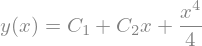

In [49]:
ode_sol2.subs(y(x).diff(x),y1)

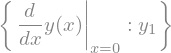

In [50]:
{y(x).diff(x).subs(x,0): y1}

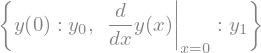

In [51]:
IC2 = {y(0): y0, y(x).diff(x).subs(x, 0): y1}
IC2

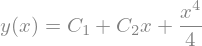

In [52]:
y_eq2 = ode_sol2.subs(IC2)
y_eq2

In [53]:
y_eq2.free_symbols

In [54]:
sol = y_eq2

eqs = [(sol.lhs.diff(x, n) - sol.rhs.diff(x, n)).subs(x, 0).subs(IC2) \
       for n in range(len(IC2))]

In [55]:
eqs

In [56]:
y_sol2 = sympy.solve(eqs, y_eq2.free_symbols)
y_sol2 

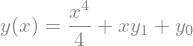

In [57]:
ode_sol2.subs(y_sol2)

<div class="alert alert-block alert-success">
<b>Take note:</b> To solve this method numerically using SciPy, first you need to express second order ODE into a system of first order.
</div>

- See [SciPy Notes](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) for an example of **the second order differential equation for the angle theta of a pendulum acted on by gravity with friction**


# Solution for single variable equation

# Solution for systems of equation